<a href="https://colab.research.google.com/github/Pranayshukla0610/Ensemble_learning_machine_learning/blob/main/Bagging_Regressor_On_Housing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('/content/housing.csv (1).zip')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [6]:
df.fillna(df.median(numeric_only=True),inplace=True)

In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
df['rooms_per_household'] = df['total_rooms']/df["total_bedrooms"]

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714


In [10]:
df['population_density'] = df['population']/df['households']

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_density
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.821705,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.418626,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,7.721053,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.421277,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,5.810714,2.181467


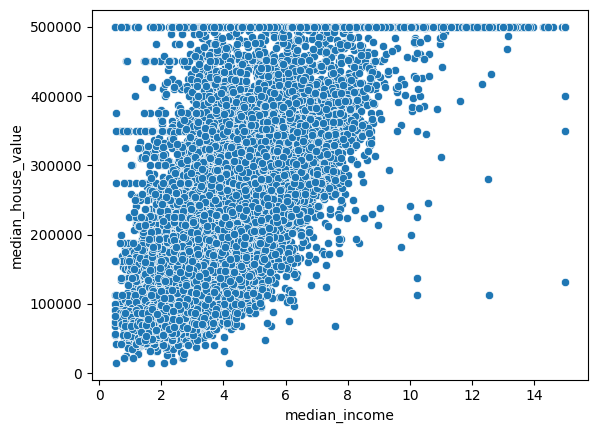

In [12]:
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.show()

In [13]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x = 'median_income',
    y = 'housing_median_age',
    z = 'median_house_value'
)
fig.show()

In [14]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [17]:
pd.get_dummies(df, drop_first=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_density,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.821705,2.555556,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.418626,2.109842,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,7.721053,2.802260,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.421277,2.547945,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,5.810714,2.181467,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,4.451872,2.560606,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,4.646667,3.122807,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,4.647423,2.325635,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,4.547677,2.123209,True,False,False,False


In [18]:
X = df.drop('median_house_value',axis=1)
y = df['median_house_value']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_cols = X.select_dtypes(include=['float64','int64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer([
    ('num',StandardScaler(),num_cols),
    ('cat',OneHotEncoder(),cat_cols)
])
X = preprocessor.fit_transform(X)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   longitude            20640 non-null  float64
 1   latitude             20640 non-null  float64
 2   housing_median_age   20640 non-null  float64
 3   total_rooms          20640 non-null  float64
 4   total_bedrooms       20640 non-null  float64
 5   population           20640 non-null  float64
 6   households           20640 non-null  float64
 7   median_income        20640 non-null  float64
 8   median_house_value   20640 non-null  float64
 9   ocean_proximity      20640 non-null  object 
 10  rooms_per_household  20640 non-null  float64
 11  population_density   20640 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [24]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)

print("Baseline RSME:",np.sqrt(mean_squared_error(pred,y_test)))

Baseline RSME: 73186.37407097867


In [28]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42
)
bag.fit(X_train, y_train)
pred = bag.predict(X_test)

In [30]:
print('Bagging RSME:', np.sqrt(mean_squared_error(pred,y_test)))
print('R2 Score',r2_score(y_test,pred))

Bagging RSME: 51046.774243216656
R2 Score 0.8011480992647096


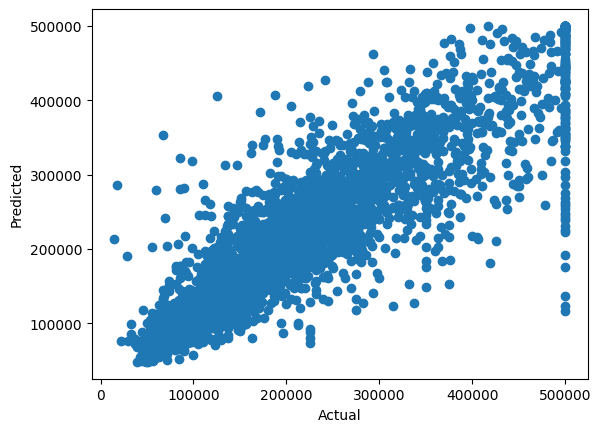

In [31]:
plt.scatter(y_test,pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

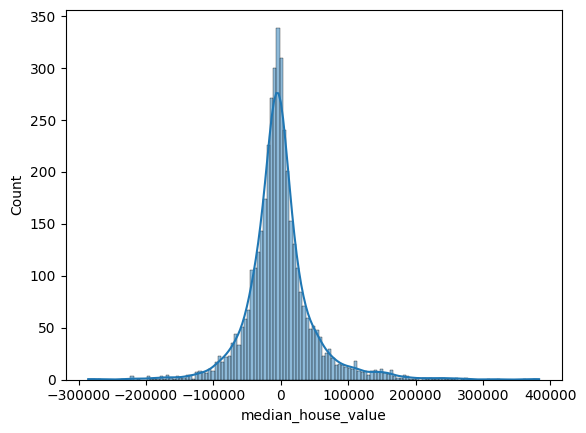

In [32]:
residuals = y_test-pred
sns.histplot(residuals,kde=True)
plt.show()

In [33]:
bag_oob = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=100,
    oob_score=True,
    random_state=42
)

bag_oob.fit(X_train,y_train)
print("OOB Score:", bag_oob.oob_score_)

OOB Score: 0.81096777604796


In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[20,50,100],
    'max_samples':[0.5,0.7,1.0]
}

grid = GridSearchCV(bag, params, cv=3)

grid.fit(X_train,y_train)

print(grid.best_params_)


{'max_samples': 1.0, 'n_estimators': 100}


In [35]:
from sklearn.svm import SVR

bag_svr = BaggingRegressor(
    estimator=SVR(),
    n_estimators=10
)

bag_svr.fit(X_train,y_train)


BaggingRegressor(estimator=SVR())

In [36]:
from sklearn.linear_model import LinearRegression

bag_lr = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=10
)

bag_lr.fit(X_train,y_train)


BaggingRegressor(estimator=LinearRegression())